<a href="https://colab.research.google.com/github/ISSQ1/KAUST_Stage2/blob/main/KAIAI24_Stage_2_NeuralNetwork_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
import numpy as np
import torch
from tqdm import tqdm
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision.transforms.functional import to_tensor
import matplotlib.pyplot as plt
#not in scope of this course
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [11]:
train_dataset = CIFAR10("/", download = True, train = True, transform = T.ToTensor())
test_dataset = CIFAR10("/", download = True, train = False, transform = T.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [3]:
bs = 32

train_loader = DataLoader(train_dataset, batch_size = bs)
test_loader = DataLoader(test_dataset, batch_size = bs)

#Tasks
#1) Create at least 4 layers NN to classify the dataset
#2) Train the neural network on train dataset
#3) Show the training loss
#4) Calculate the accuracy on test set
#5) Show a few incorrectly classified samples
#6) Calculate class-wise accuracy (implement the function yourself)

##Task 1: Create at least 4 layers NN to classify the dataset

In [4]:
#Create at least 4 layers NN to classify the dataset
class NN4Layer(nn.Module):

  def __init__(self, num_inp, num_hidden, num_out):

    super(NN4Layer, self).__init__()

    self.linear1 = nn.Linear(in_features=num_inp, out_features=num_hidden)
    self.linear2 = nn.Linear(in_features=num_hidden, out_features=num_hidden)
    self.linear3 = nn.Linear(in_features=num_hidden, out_features=num_hidden)
    self.linear4 = nn.Linear(in_features=num_hidden, out_features=num_out)

    self.hidden_activation = nn.ReLU()
    self.out_activation = nn.Softmax(dim=1)


  def forward(self, x):

    z1 = self.linear1(x)
    a1 = self.hidden_activation(z1)
    z2 = self.linear2(a1)
    a2 = self.hidden_activation(z2)
    z3 = self.linear3(a2)
    a3 = self.hidden_activation(z3)
    z4 = self.linear4(a3)
    y_hat = self.out_activation(z4)

    return y_hat

##Task 2: Train the neural network on train dataset

In [5]:
#Train the neural network on train dataset
num_epochs = 12
lr = 1e-4

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_losses = []
val_losses = []

model = NN4Layer(num_inp=3072, num_hidden=50, num_out=10).to(device)

optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

print(f'Using device {device}')

Using device cpu


In [6]:
for epoch_no in tqdm(range(num_epochs)):

  model.train()

  epoch_weighted_loss = 0

  for batch_X, batch_y in train_loader:

    batch_X = batch_X.view(-1, 3*32*32).to(device)
    batch_y = batch_y.to(device)

    batch_y_probs = model(batch_X)

    loss = criterion(batch_y_probs, batch_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_weighted_loss += (len(batch_y)*loss.item())

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)
  train_losses.append(epoch_loss)


  model.eval()
  correctly_labelled = 0

  with torch.no_grad():

    val_epoch_weighted_loss = 0

    for val_batch_X, val_batch_y in test_loader:

      val_batch_X = val_batch_X.view(-1, 3*32*32).to(device)
      val_batch_y = val_batch_y.to(device)

      val_batch_y_probs = model(val_batch_X)
      loss = criterion(val_batch_y_probs, val_batch_y)
      val_epoch_weighted_loss += (len(val_batch_y)*loss.item())

      val_batch_y_pred = val_batch_y_probs.argmax(dim=1)

      correctly_labelled += (val_batch_y_pred == val_batch_y).sum().item()
  val_epoch_loss = val_epoch_weighted_loss/len(test_loader.dataset)
  val_losses.append(val_epoch_loss)

  print(f'Epoch: {epoch_no}, train_loss={epoch_loss}, val_loss={val_epoch_loss}. labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({correctly_labelled/len(test_loader.dataset)*100}% accuracy)')

print(f'Training complete on device {device}. Change device variable and run again to see the difference.')

  8%|▊         | 1/12 [00:19<03:32, 19.35s/it]

Epoch: 0, train_loss=2.229108659210205, val_loss=2.1839636112213134. labelled 2729/10000 correctly (27.29% accuracy)


 17%|█▋        | 2/12 [00:37<03:05, 18.53s/it]

Epoch: 1, train_loss=2.1729884482574464, val_loss=2.1602737655639648. labelled 2897/10000 correctly (28.970000000000002% accuracy)


 25%|██▌       | 3/12 [00:55<02:44, 18.25s/it]

Epoch: 2, train_loss=2.15308361869812, val_loss=2.141069316101074. labelled 3116/10000 correctly (31.16% accuracy)


 33%|███▎      | 4/12 [01:12<02:23, 17.88s/it]

Epoch: 3, train_loss=2.1339123465728758, val_loss=2.1241710594177245. labelled 3306/10000 correctly (33.06% accuracy)


 42%|████▏     | 5/12 [01:30<02:06, 18.05s/it]

Epoch: 4, train_loss=2.1210249781799315, val_loss=2.1135744915008545. labelled 3425/10000 correctly (34.25% accuracy)


 50%|█████     | 6/12 [01:48<01:48, 18.04s/it]

Epoch: 5, train_loss=2.1127541902160645, val_loss=2.1061071590423586. labelled 3508/10000 correctly (35.08% accuracy)


 58%|█████▊    | 7/12 [02:07<01:31, 18.37s/it]

Epoch: 6, train_loss=2.1062412618255615, val_loss=2.101298458480835. labelled 3558/10000 correctly (35.58% accuracy)


 67%|██████▋   | 8/12 [02:25<01:12, 18.01s/it]

Epoch: 7, train_loss=2.1007739178466798, val_loss=2.09839727973938. labelled 3567/10000 correctly (35.67% accuracy)


 75%|███████▌  | 9/12 [02:42<00:53, 17.92s/it]

Epoch: 8, train_loss=2.0960104233551027, val_loss=2.096106801986694. labelled 3591/10000 correctly (35.91% accuracy)


 83%|████████▎ | 10/12 [03:01<00:35, 17.99s/it]

Epoch: 9, train_loss=2.091356516494751, val_loss=2.092626606750488. labelled 3612/10000 correctly (36.120000000000005% accuracy)


 92%|█████████▏| 11/12 [03:18<00:17, 17.84s/it]

Epoch: 10, train_loss=2.0862902309417724, val_loss=2.088089818954468. labelled 3645/10000 correctly (36.449999999999996% accuracy)


100%|██████████| 12/12 [03:37<00:00, 18.10s/it]

Epoch: 11, train_loss=2.0819224953460695, val_loss=2.084244151687622. labelled 3698/10000 correctly (36.980000000000004% accuracy)
Training complete on device cpu. Change device variable and run again to see the difference.


##Task 3: Show the training loss

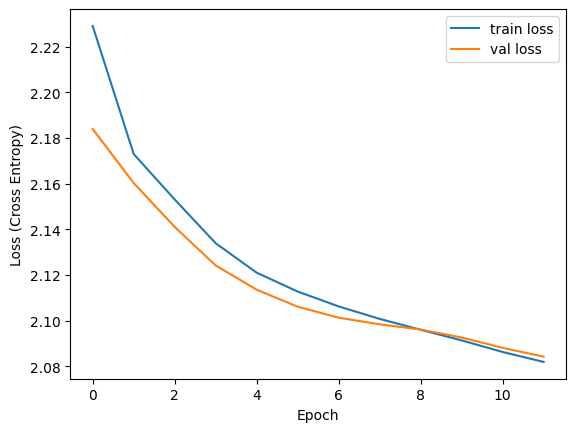

In [7]:
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.show()

##Task 4: Calculate the accuracy on test set

In [8]:
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 3*32*32).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()


accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 36.98%


##Task 5: Show a few incorrectly classified samples

In [9]:
incorrect_samples = []
incorrect_mask = (val_batch_y_pred != val_batch_y)
for idx in range(len(val_batch_y)):
    if incorrect_mask[idx]:
        incorrect_samples.append((val_batch_X[idx].cpu(), val_batch_y[idx].item(), val_batch_y_pred[idx].item()))
print("Incorrectly Classified Samples:")
for i in range(min(5, len(incorrect_samples))):
    sample_X, true_label, predicted_label = incorrect_samples[i]
    print(f'Sample {i + 1}: True Label: {true_label}, Predicted Label: {predicted_label}')


Incorrectly Classified Samples:
Sample 1: True Label: 7, Predicted Label: 4
Sample 2: True Label: 5, Predicted Label: 7
Sample 3: True Label: 8, Predicted Label: 1
Sample 4: True Label: 0, Predicted Label: 8
Sample 5: True Label: 8, Predicted Label: 1


##Task 6: Calculate class-wise accuracy

In [10]:
def class_wise_accuracy(model, data_loader):
    class_correct = [0 for _ in range(10)]
    class_total = [0 for _ in range(10)]
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(-1, 3*32*32).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
    class_accuracy = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(10)]
    return class_accuracy

class_accuracy = class_wise_accuracy(model, test_loader)
for i in range(10):
    print(f'Class {i} accuracy: {class_accuracy[i]:.2f}%')

Class 0 accuracy: 45.60%
Class 1 accuracy: 48.30%
Class 2 accuracy: 8.70%
Class 3 accuracy: 10.20%
Class 4 accuracy: 26.40%
Class 5 accuracy: 39.80%
Class 6 accuracy: 58.00%
Class 7 accuracy: 31.50%
Class 8 accuracy: 61.10%
Class 9 accuracy: 40.20%
